In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from inference import YOLOApplier
from os.path import join
import supervisely_lib as sly

%matplotlib inline

In [2]:
netw = YOLOApplier()

{"message": "Will init all required to inference.", "timestamp": "2018-10-08T08:28:11.687Z", "level": "info"}
{"message": "Input config", "config": {"gpu_devices": [0], "model_classes": {"save_classes": "__all__", "add_suffix": "_unet"}, "existing_objects": {"save_classes": [], "add_suffix": ""}, "mode": {"source": "roi", "bounds": {"left": "10%", "top": "0%", "right": "5%", "bottom": "0%"}, "save": "False", "class_name": "inference_roi"}}, "timestamp": "2018-10-08T08:28:11.689Z", "level": "info"}
{"message": "Full config", "config": {"gpu_devices": [0], "min_score_threshold": 0.5, "model_classes": {"save_classes": "__all__", "add_suffix": "_unet"}, "existing_objects": {"save_classes": [], "add_suffix": ""}, "mode": {"source": "roi", "bounds": {"left": "10%", "top": "0%", "right": "5%", "bottom": "0%"}, "save": "False", "class_name": "inference_roi"}}, "timestamp": "2018-10-08T08:28:11.690Z", "level": "info"}
{"message": "Read model internal class mapping", "class_mapping": {"person": 

In [3]:
model = sly.utils.InfFeederRoi(netw.config, netw.helper.in_project_meta, netw.train_classes)

In [4]:
project_meta = netw.helper.in_project_meta  # Project meta contains list of project classes.
project_dir = netw.helper.paths.project_dir
project_fs = sly.ProjectFS.from_disk_dir_project(project_dir)

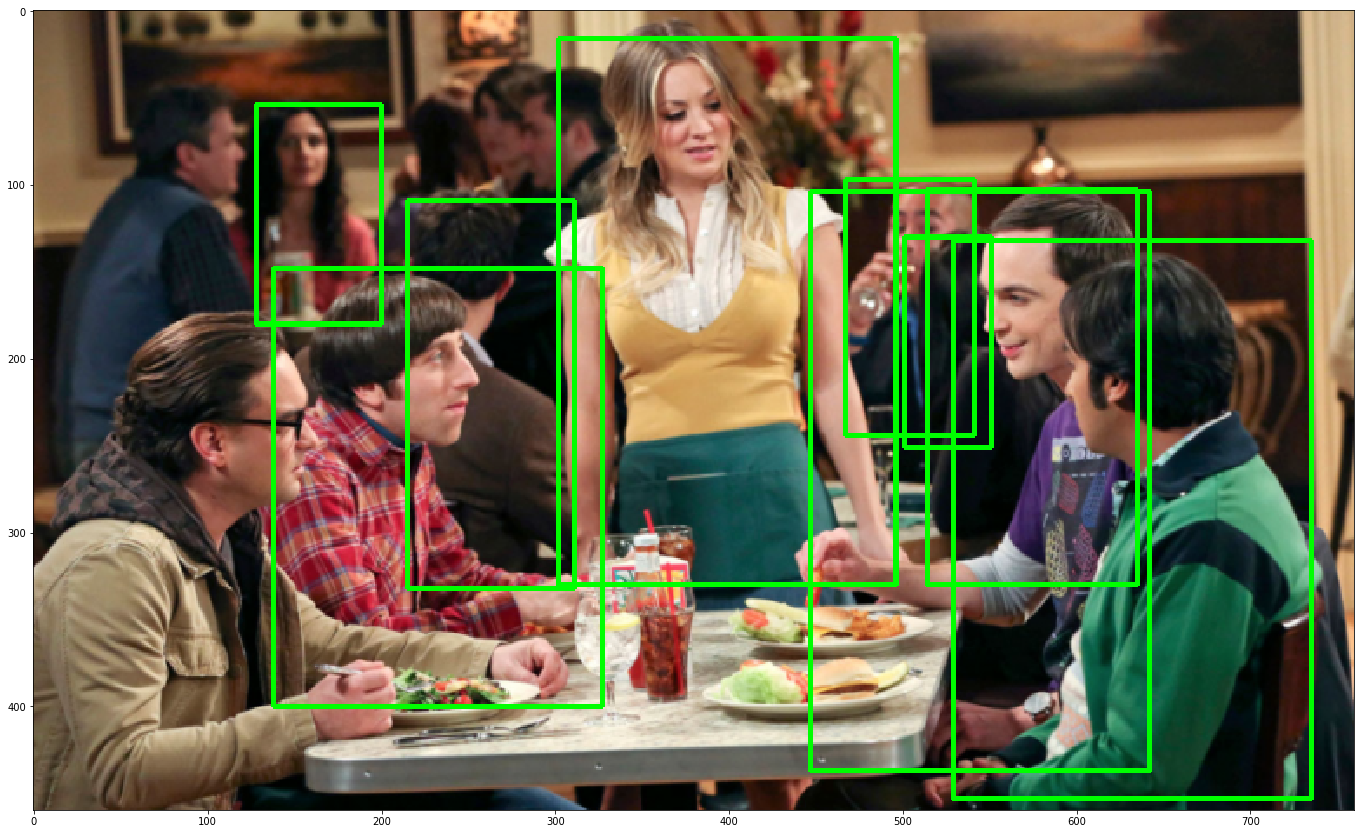

In [5]:
for item_descr in project_fs:
    plt.figure(figsize=(50, 50))
    ann_packed = sly.json_load(item_descr.ann_path)
    ann = sly.Annotation.from_packed(ann_packed, project_meta)
    img = cv2.imread(item_descr.img_path)[:, :, ::-1].astype(np.uint8)
    new_ann = model.feed(img, ann, netw._infer_on_img)
    for obj in new_ann["objects"]:
        if "person" in obj.class_title:
            obj.draw_contour(img, [0,255,0], 2)
    plt.subplot(3,1,1)
    plt.imshow(img)
    plt.show()